<a href="https://colab.research.google.com/github/namJeongwan/pythonAI/blob/master/2022-08-25_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7779cf9f2999ded4b41b98bea6bc3f9ecec29f038146f6477cf1ea794c2659b4
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Gl

X.shape:  (26, 2)


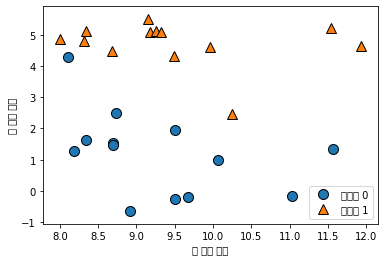

In [5]:
# 데이터 생성
X, y = mglearn.datasets.make_forge()
# 산점도 생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: ", X.shape)

Text(0, 0.5, '타겟')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44191 missing from current font.
  font.set_text

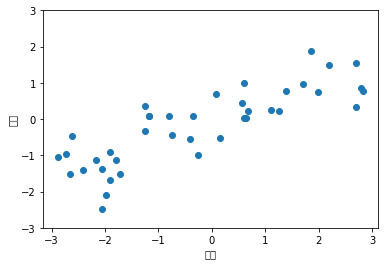

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [7]:
# 암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():")
print(cancer.keys())

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(f"유방암 데이터의 형태: {cancer.data.shape}")

유방암 데이터의 형태: (569, 30)


In [9]:
print("클래스 별 샘플 개수: ")
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 개수: 
{'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름: ")
print(cancer.feature_names)

특성 이름: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
# 보스턴 주택 가격 데이터셋 
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: ", boston.data.shape)

데이터의 형태:  (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [12]:
# Feature를 확장한 데이터 가져오기(특성공학)
X, y = mglearn.datasets.load_extended_boston()
print("X.shape", X.shape)

X.shape (506, 104)


# k-최근접 이웃 분류 (k-Nearest Neighbors)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


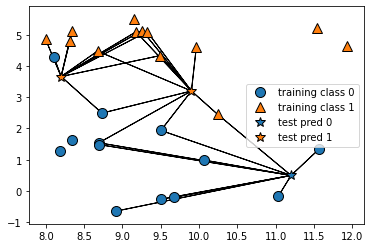

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [15]:
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Test Set 예측
print(f"테스트 세트 예측: {clf.predict(X_test)}")
print(f"테스트 세트 정확도: {clf.score(X_test, y_test): .2f}")

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도:  0.86


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

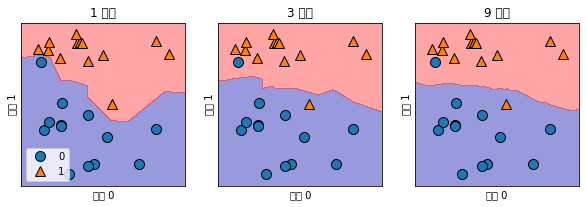

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메소드는 self 오브젝트를 리턴
  # 그래서 객체 생성과 fit 메소드를 한 줄에 사용 가능
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f"{n_neighbors} 이웃")
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 유방암 Sample

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text

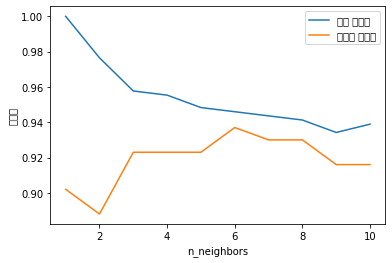

In [19]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracies = list()
test_accuracies = list()
# 1에서 10 까지의 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 셋 정확도 저장
  training_accuracies.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracies.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracies, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracies, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

### k-최근접 이웃 알고리즘 - 회귀

In [20]:
from sklearn.neighbors import KNeighborsRegressor 

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
# 테스트 데이터 예측
print("테스트 세트 예측: ")
print(reg.predict(X_test))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
print(f"테스트 세트 R^2: {reg.score(X_test, y_test): .2f}")

테스트 세트 R^2:  0.83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'bset'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

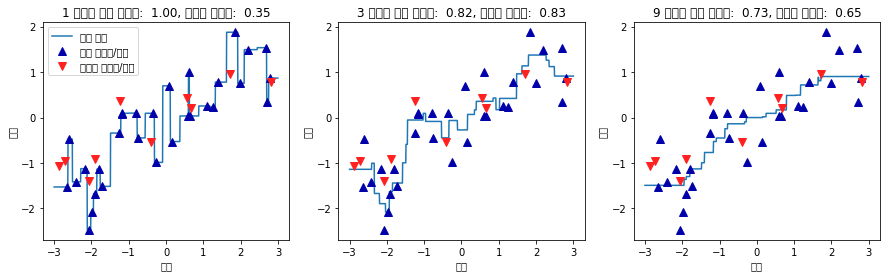

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 합니다
  reg = KNeighborsRegressor(n_neighbors=n_neighbors, metric="euclidean")
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
      f"{n_neighbors} 이웃의 훈련 스코어: {reg.score(X_train, y_train): .2f}, "
      f"테스트 스코어: {reg.score(X_test, y_test): .2f}")
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc='bset')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'bset'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_

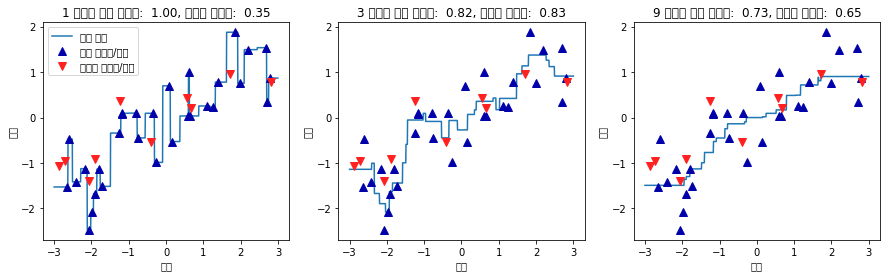

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 합니다
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
      f"{n_neighbors} 이웃의 훈련 스코어: {reg.score(X_train, y_train): .2f}, "
      f"테스트 스코어: {reg.score(X_test, y_test): .2f}")
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc='bset')

# 선형회귀 (최소제곱법)

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [26]:
# 기울기, 가중치(Weight), 계수(coeffcience)
print(f"lr.coef_: {lr.coef_}")
# 편향(offset), 절편(intercept)
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print(f"훈련 세트 점수: {lr.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {lr.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.67
테스트 세트 점수:  0.66


#### 성능이 66~67점의 결과를 보이는 것은 좋은 상황은 아니다.
#### 하지만 훈련 세트와 테스트 세트의 점수가 비슷 한 것을 알 수 있고,
#### 이는 과소적합 상태인 것을 의미한다(데이터 부족)

### 보스턴 주택가격 데이터셋

In [28]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [29]:
print(f"훈련 세트 점수: {lr.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {lr.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.95
테스트 세트 점수:  0.61


훈련 데이터와 테스트 데이터 사이의 성능 차이가 이렇게 심한 경우는..
과대적합(학습데이터가 과한경우)으로 판단할 수 있다

# 리지(Ridge) 회귀
리지(Ridge)도 회귀를 위한 선형 모델이므로 <u>최소적합법</u>에서 사용한 것과 같은 예측 함수를 사용한다.<br>
하지만 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위한 것 뿐만 아닌, <b><u>추가 제약 조건</u></b>을 만족시키기 위한 목적도 있다.<br>
즉, 가중치의 모든 원소가 0에 가깝게 되도록 튜닝하는 모델이다.<br><br>

직관적으로 생각한다면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다<br>
(이렇게 하면 뭐가 좋나?..)<br>
이런 제약을 규제(regularzation)라고 정의한다.<br>
규제란? 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.<br>
리지 회귀에 사용하는 규제 방식은 L2 규제라고 한다.<br>
(과대적합을 방지하기 위해 특성 -> 출력의 관계를 제한한다는 거구만..)


## 보스턴 데이터 셋
<br>
결과를 보니 LinearRegression보다 Traning Score는 0.06이 낮아졌지만<br>
Test Score는 0.14가 높아졌으니 과대 적합이 해소가 된 것으로 확인이 되고..<br>
사용자가 모델에서 신경써야 할 것은 Test Score이니 LinearRegression보다 Ridge 모델을 선택하는 것이 더 낫다고 판단된다.

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print(f"훈련 세트 점수: {ridge.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {ridge.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.89
테스트 세트 점수:  0.75


Ridge 모델은 단순하게 (Weight를 0에 가깝게) 해주고 <br>
Training <-> Test 성능 사이를 절충할 수 있는 방법을 제공한다. <br>

사용자는 alpha 값을 변경하여 모델을 얼마나 단순하게 변경할 지 설정할 수 있다.<br>
기본 값은 1.0 이며 값을 높이면 Training Score에는 부정적인 영향을 끼치지만 <br>
일반화에는 도움이 되어 Test Score에 긍정적인 영향을 줄 수 있다

alpha:= 10 => ??? 오히려 내려감..

In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(f"훈련 세트 점수: {ridge10.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {ridge10.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.79
테스트 세트 점수:  0.64


alpha:= 0.1 => 0.1이 최적의 alpha 값일 듯 하다.

In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"훈련 세트 점수: {ridge01.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {ridge01.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.93
테스트 세트 점수:  0.77


또한 alpha 값에 따라 모델의 coef_(Weight) 속성이 어떻게 달라지는지 확인해보자.<br> 아마 높은 alpha 값은 제약이 더 많은 모델이므로 복잡도가 증가하며 Weight가 작을 것이고,<br>
낮은 alpha 값은 반대로 제약이 적은 모델이므로 상대적으로 복잡도가 낮아지며 Weight가 클 것이다

alpha:
- 높을 때: 규제의 강도를 높임
- 낮을 때: 규제의 강도를 낮춤

C:
- 높을 때: 규제의 강도를 낮춤
- 낮을 때: 규제의 강도를 높임

규제:
- 높을 때: 모델 복잡성이 낮아짐
- 낮을 때: 모델 복잡성이 높아짐

모델 복잡성:
- 높을 때: 일반화가 비교적 잘 되어 Test Score가 높아짐, 계수가 커진다.
- 낮을 때: 훈련 세트에 맞추어서 Training Score가 높아짐, 계수가 낮아진다.



결론 !:

- 규제의 강도가 높으면 이것 저것 제한하는게 많아 모델 복잡성이 낮아지고, 모델 복잡성이 낮아지다 보니 일반화가 비교적 잘 되어 Test Score가 높아지고, 계수가 커진다.


- 규제의 강도가 낮으면 제한하는게 없어져 모델 복잡성이 높아지고, 모델 복잡성이 높아지다 보니 일반화가 잘 되지 않아 Training Set에 특화되어 Training Score가 높아지고, 계수가 낮아진다

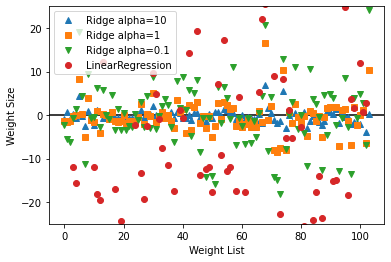

In [33]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Weight List')
plt.ylabel('Weight Size')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()



> 계수 = Weight



위 그림에서 x 축은 Weight의 원소를 위치대로 나열한 것이다.<br>
즉 x=0은 첫 번째 특성에 연관된 계수이고, x=1은 두 번째 특성에 연관된 계수이다.<br><br>
이런 식으로 x=100까지 나타나며, y축은 각 계수의 수치를 나타낸다.<br><br>
alpha10은 대부분의 계수가 -3과 3 사이를 오가는데,
alpha1과 0.1에서 점점 커지며<br>
아무런 제약이 없는 LinearRegression 에는 급기야 그림 밖까지 나타나기 시작했다;; 



---







규제의 효과를 이해하는 또 다른 좋은 방법은 alpha 값을 고정하고<br>
훈련 데이터의 크기를 변화시켜 보는 것이다.<br><br>

아래 그림은 보스턴 주택 가격 데이터 셋에서 여러 가지 크기로 Sampling 하여<br>
LinearRegression과 Ridge(alpha=1)을 적용한 것이다.<br>
(데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선이라고 한다.)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

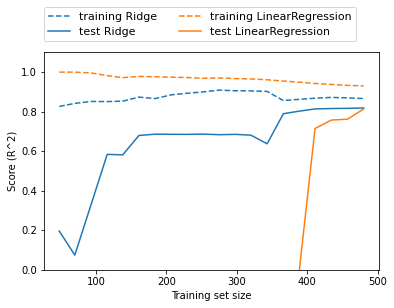

In [34]:
mglearn.plots.plot_ridge_n_samples()

예상대로 모든 데이터셋에 대해 Ridge와 LinearRegression 모두<br>
Training Score가 Test Score보다 높다.<br><br>

Ridge는 규제가 적용되므로 Training Score는 LinearRegression보다 낮으나,<br>
Test Score의 경우 전반적으로 LinearRegression 모델보다 높은 것을 볼 수 있다.<br><br>

여기서 주목해야 할 부분은 데이터를 충분히 학습하면 규제의 중요성이 덜 해져서<br>
Ridge나 LinearRegression이나 Test Score가 비슷비슷 하다는거다,.(과소적합 해결)<br><br>

또 하나 눈여겨 보아야 할 것은 선형회귀의 Training Score가 점점 감소한다는 점이다.<br>
이건 훈련 데이터가 많으면 많을 수록 모델이 데이터를 기억하기 어려워서 그렇다고 한다<br>
(뭐,, Test Score가 급상승 한 것을보면 별로 와닿진 않는다 !!)

# 라소(Lasso)


---

LinearRegression에 규제를 적용하는데 Ridge의 대안으로 Lasso가 있다.<br>
Ridge와 같이 Lasso도 계수를 0에 가깝게 만들려고 하는 성질(?)이 있다.<br>
하지만 방식이 조금 다르며 이를 L1 규제(Ridge 는 L2 규제)라고 한다.<br>
L1 규제를 사용할 때 어떤 계수는 정말 0이 되기도 한다.(Ridge는 안그랬어?!)<br>
이 말은 모델에서 완전히 제외되는 Feature가 있다는 말이다 !!(아하!)<br><br>

## Lasso - 보스턴 주택가격 세트

확장된 보스턴 주택 가격 데이터셋에 라소를 적용해보자

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {lasso.score(X_test,  y_test): .2f}")
print(f"사용한 특성의 개수: {np.sum(lasso.coef_ != 0)}")

훈련 세트 점수:  0.29
테스트 세트 점수:  0.21
사용한 특성의 개수: 4


결과에서 볼 수 있듯이 훈련과, 예측 성능이 둘 다 좋지 않다.(underfitting)><br>
104개의 특성중 4개만 사용한 것을 볼 수 있다!!<br>


underfitting을 줄이기 위해서 alpha 값을 줄여보겠다.<br>
이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.

In [36]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso001.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {lasso001.score(X_test,  y_test): .2f}")
print(f"사용한 특성의 개수: {np.sum(lasso001.coef_ != 0)}")

훈련 세트 점수:  0.90
테스트 세트 점수:  0.77
사용한 특성의 개수: 33


단.. Alpha 값을 너무 낮추면 규제의 효과가 없어져(모델이 너무 복잡해져),<br>
overfitting이 되므로 LinearRegression과 결과가 비슷해진다

In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print(f"훈련 세트 점수: {lasso00001.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {lasso00001.score(X_test,  y_test): .2f}")
print(f"사용한 특성의 개수: {np.sum(lasso00001.coef_ != 0)}")

훈련 세트 점수:  0.95
테스트 세트 점수:  0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_te

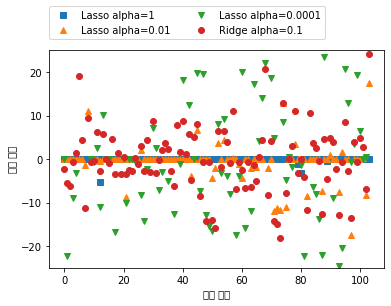

In [38]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

# 분류용 선형 모델



---

분류형 선형 모델에서는 <u><b>결정 경계</b></u>가 입력의 선형 함수이다.<br>
다른 말로하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해 2개의 클래스를 구분하는 분류기이다.<br>
<br>
선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분이 가능하다.<br>

*   특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
*   사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
<br><br>

가장 널리 알려준 2개의 선형 분류 알고리즘은<br>
로지스틱 회귀(Logistic Regression)<br>
서포트 벡터 머신(Support Vector Machine) 이다.<br>
<br>





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


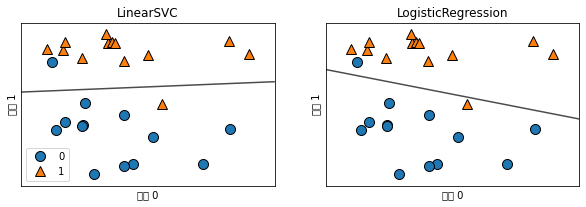

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()

두 모델 다 직선이 하나 그어져 있는데 이를 <u><b>결정 경계</b></u> 라고 한다.<br>

결정 경계를 기준으로 위를 클래스1, 아래를 클래스2 라고 가정했을 때 두 모델 다 잘못 분류가 된 포인트 2개를 발견할 수 있다.
<br>

회귀에서 본 Ridge와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용한다.<br>

LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C라고 지칭한다.<br>

C와 alpha는 반대다:<br>
alpha의 값은 규제와 정비례이며,<br>
C 값은 규제와 반비례이다
<br>

즉, C의 값을 낮추면(규제가 높아지면) 데이터 포인트 중 다수에 맞추려고 하는 반면,<br>
C의 값을 높이면(규제가 낮아지면) 개개의 데이터 포인트를 정확히 분류하려고 노력할 것이다.

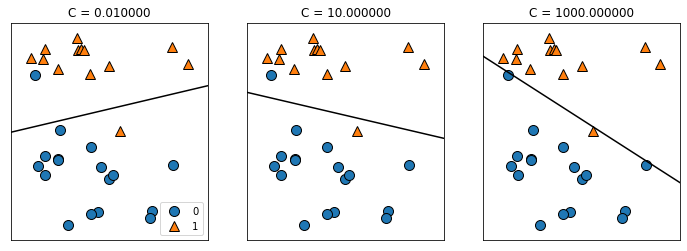

In [40]:
mglearn.plots.plot_linear_svc_regularization()

C가 0.01일 때:
- 규제가 강해짐
- 결정 경계가 수평에 가까워짐(기울기가 0에 가까워짐)
- 잘못 분류한 데이터 포인트는 2개

<br>

C가 10일 때:
- 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐

<br>

C가 1000일 때:
- 결정 경계가 많이 기울어짐
- 클래스 0(아래쪽)의 모든 데이터를 올바르게 분류함
- 클래스의 전체적인 배치를 잘 파악하지 못한 것.
- Overfitting이 된 것으로 판단.

<br>
회귀와 비슷한 분류에서의 선형 모델은 낮은 차원의 데이터에서는,<br>
결정 경계가 직선이거나 평면이어서 매우 제한적으로 보임.<br>
<br>
하지만, 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며, 특성이 많아지면 Overfitting이 되지 않도록 하는 것이 중요해진다.

## 유방암 데이터셋

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {logreg.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {logreg.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.96
테스트 세트 점수:  0.96


기본값(C=1)으로 굉장한 성능을 낸다.<br>
하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로,<br>
underfitting 으로 판단이 된다 !<br>
모델의 제약을 더 풀어주기 위해 C를 증가시켜보자 !

In [42]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {logreg100.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {logreg100.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.98
테스트 세트 점수:  0.97


C를 100으로 세팅해주니 훈련 성능과 테스트 성능이 증가한다.<br>
이는 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.<br>
이번엔 규제를 더 강하게 하기 위해서 C를 0.01로 내려보겠다.

In [43]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)

print(f"훈련 세트 점수: {logreg001.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {logreg001.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.95
테스트 세트 점수:  0.95


예상대로 이미 underfitting이 일어난 모델에서 왼쪽으로 더 이동하게 되므로,<br> 훈련 세트와 테스트 세트의 정확도는 기본 매개변수보다 낮아지게된다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

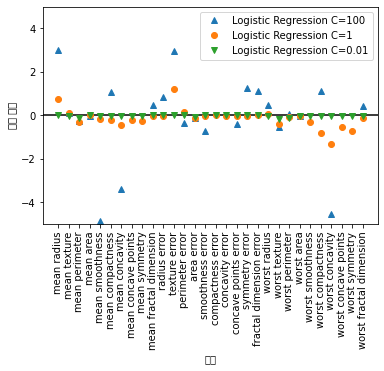

In [44]:
plt.plot(logreg100.coef_.T, '^', label='Logistic Regression C=100')
plt.plot(logreg.coef_.T, 'o', label='Logistic Regression C=1')
plt.plot(logreg001.coef_.T, 'v', label='Logistic Regression C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()

plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋다(나는 L1이나 L2나 둘 다 어렵지만..)

C=0.010 인 L1 규제 로지스틱 회귀의 훈련 정확도: 0.9178403755868545
C=0.010 인 L1 규제 로지스틱 회귀의 테스트 정확도: 0.9300699300699301
C=1.000 인 L1 규제 로지스틱 회귀의 훈련 정확도: 0.960093896713615
C=1.000 인 L1 규제 로지스틱 회귀의 테스트 정확도: 0.958041958041958
C=100.000 인 L1 규제 로지스틱 회귀의 훈련 정확도: 0.9859154929577465
C=100.000 인 L1 규제 로지스틱 회귀의 테스트 정확도: 0.9790209790209791


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

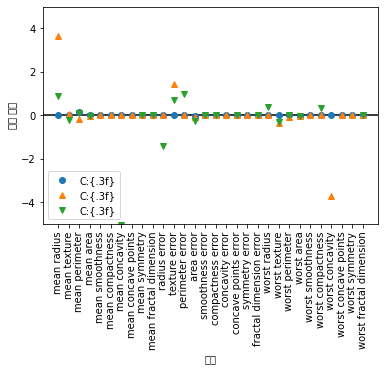

In [45]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', 
                             max_iter=1000).fit(X_train, y_train)
  print(f"C={C:.3f} 인 L1 규제 로지스틱 회귀의 훈련 정확도: {lr_l1.score(X_train, y_train)}")
  print(f"C={C:.3f} 인 L1 규제 로지스틱 회귀의 테스트 정확도: {lr_l1.score(X_test, y_test)}")
  plt.plot(lr_l1.coef_.T, marker, label="C:{.3f}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5, 5)
plt.legend(loc=3)

# 다중 클래스 분류용 선형 모델



---

LogisticRegression 을 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다.<br>
즉 Multi Class를 지원하지 않는다!(0 아니면 1)<br>
이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은<br>
일대다 (one-vs,-rest) 방법이다.<br>
일대다 방법은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.<br>
이는 결국 멀티 클래스에서 클래스의 수 만큼 이진 분류 모델을 만든다는 말이다.<br>
예측할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측 값으로 선택한다.


3 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해보자.<br>
 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따릅니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

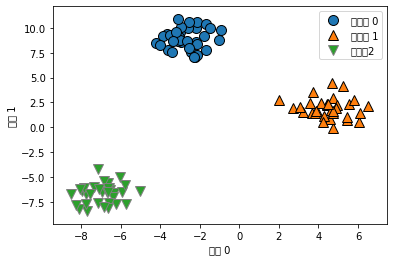

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스2'])

In [47]:
linear_svm = LinearSVC(max_iter=5000).fit(X, y)
print(f"계수 배열의 크기: {linear_svm.coef_.shape}")
print(f"절편 배열의 크기: {linear_svm.intercept_.shape}")

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

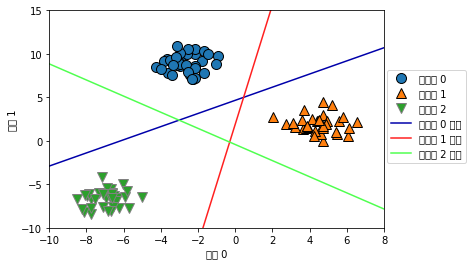

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                               mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', 
            '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text

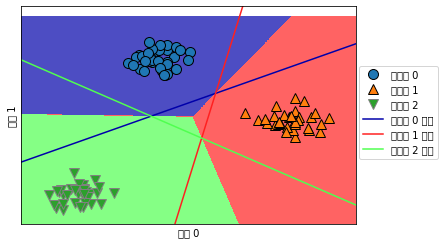

In [49]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                               mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', 
            '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

### 나이브 베이즈(Naive Bayes) 분류기

---

나이브 베이즈 분류기는 앞 절의 선형 모델과 매우 유사하다.<br>
LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이나, 그 대신 일반화 성능은 조금 뒤떨어진다.<br>
<br>

나이브 베이즈 분류기가 효과적인 이유는 각 틍성을 개별로 취급해 파라미터를 학습하고,<br>각 특성에서 클래스 별 통계를 단순하게 취합하기 때문이다.<br>
<br>

나이브 베이즈 분류기 종류:<br>
- GaussianNB: 연속적인 어떤 데이터에도 적용 가능
- BernoulliNB: 이진 데이터, 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다.
- MultinomialNB: 카운트 데이터에 적용됨

BernoulliNB, MultinnomialNB는 대부분 텍스트 데이터를 분류할 떄 사용한다.


#### 베르누이 나이브 베이즈

In [50]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 각 특성마다 1 이 나타낸 횟수를 센다.
  counts[label] = X[y == label].sum(axis=0)
print(f"특성 카운트: {counts}")


특성 카운트: {0: array([0, 2, 0, 2]), 1: array([2, 0, 2, 0])}


베르누이NB는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다.<br>
반면 멀티노미얼MB와 가우시안NB는 계산하는 통계 데이터의 종류가 조금 다르다.<br>
MultinomialNB는 클래스별로 특성의 평균을 계산하고,<br>
GaussianNB는 클래스별로 각 특성의 분산과 평균을 저장한다.<br>
<br>

예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 한다.<br>
<br>

MultinomialNB와 BernoulliNB의 예측 공식은 선형 모델과 형태가 같다.<br>
그러나 나이브 베이즈 모델의 coef_는 기울기 w가 아니라 선형모델과는 의미가 다르다

##### 장단점과 매개변수

MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다.<br><br>

alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터를 alpha 개수만큼 추가한다.<br><br>

이는 통계 데이터를 완만하게 만들어준다.<br>
<br>

alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다.<br>
alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, 선형 모델과 달리 alpha 값이 성능 향상에 크게 기여하지 않는다 !
<br><br>

GaussianNB는 대부분 매우 고차원인 데이터 셋을 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는데 사용한다.

# 결정 트리

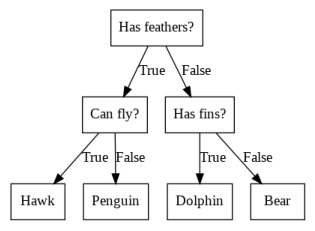

In [51]:
mglearn.plots.plot_animal_tree()

## 유밤암 데이터셋

가지치기를 하지 않으니 훈련 세트 점수가 100점으로 나왔다..
테스트 세트 점수가 나쁜건 아니지만 과대적합으로 볼 수 있다.

In [52]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print(f"훈련 세트 점수: {tree.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {tree.score(X_test,  y_test): .2f}")

훈련 세트 점수:  1.00
테스트 세트 점수:  0.94


Max Depth를 4 Depth로 지정하니 훈련점수는 낮아지고 <br>
테스트 점수는 올라갔다.

In [53]:
tree_d4 = DecisionTreeClassifier(random_state=0, 
                                 max_depth=4).fit(X_train, y_train)

print(f"훈련 세트 점수: {tree_d4.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {tree_d4.score(X_test,  y_test): .2f}")

훈련 세트 점수:  0.99
테스트 세트 점수:  0.95


In [54]:
from sklearn.tree import export_graphviz
import graphviz

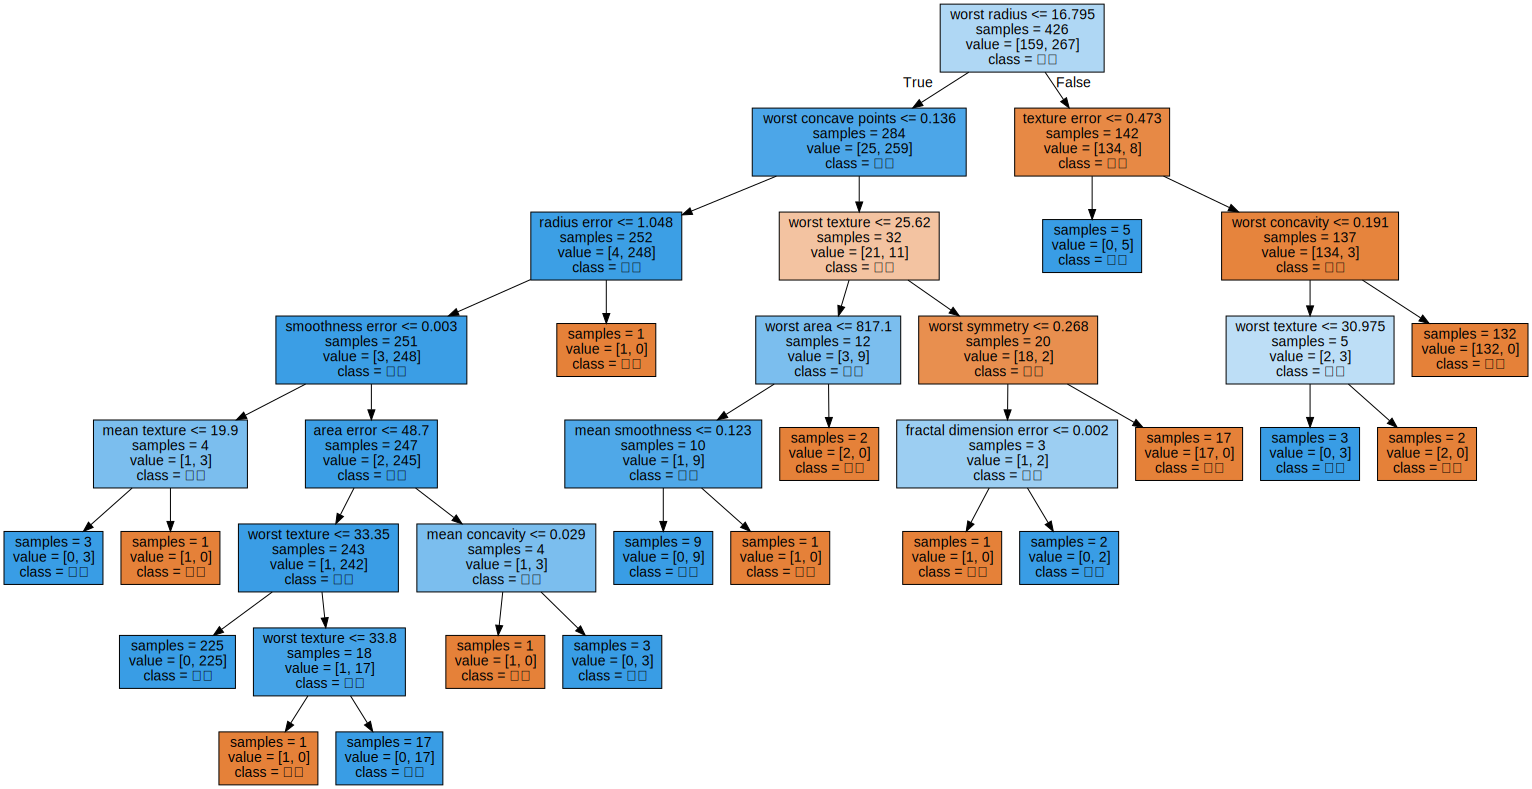

In [55]:
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))

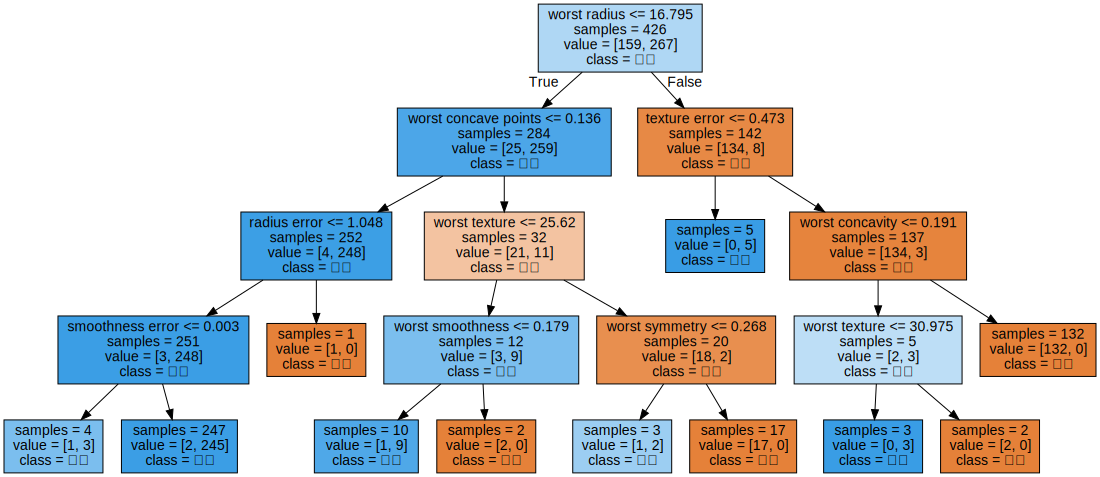

In [56]:

export_graphviz(tree_d4, out_file='tree.dot', class_names=['악성', '양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))

## 특성중요도

<br>
가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가 하는 기준<br>
이 값은 0과 1사이의 숫자로, 중요도와 비례한다. 전체의 합은 1임

In [57]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('feature importance')
  plt.ylabel('feature')
  plt.ylim(-1, n_features)

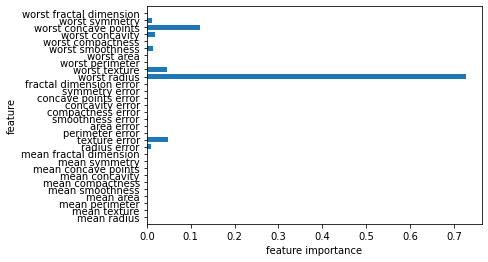

In [58]:

plot_feature_importances_cancer(tree_d4)

Feature importances: [0. 1.]


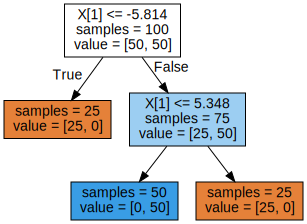

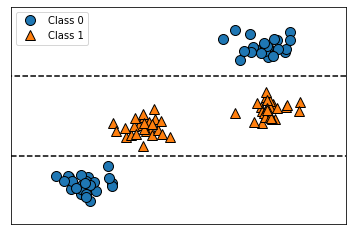

In [59]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, 'price ($/Mbyte')

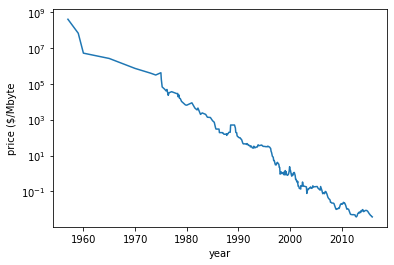

In [60]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte')

In [61]:
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행한다.
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

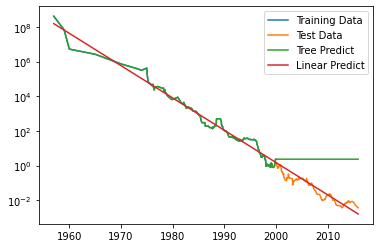

In [62]:
plt.semilogy(data_train.date, data_train.price, label='Training Data')
plt.semilogy(data_test.date, data_test.price, label='Test Data')
plt.semilogy(ram_prices.date, price_tree, label='Tree Predict')
plt.semilogy(ram_prices.date, price_lr, label='Linear Predict')
plt.legend()

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons 

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

rf = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

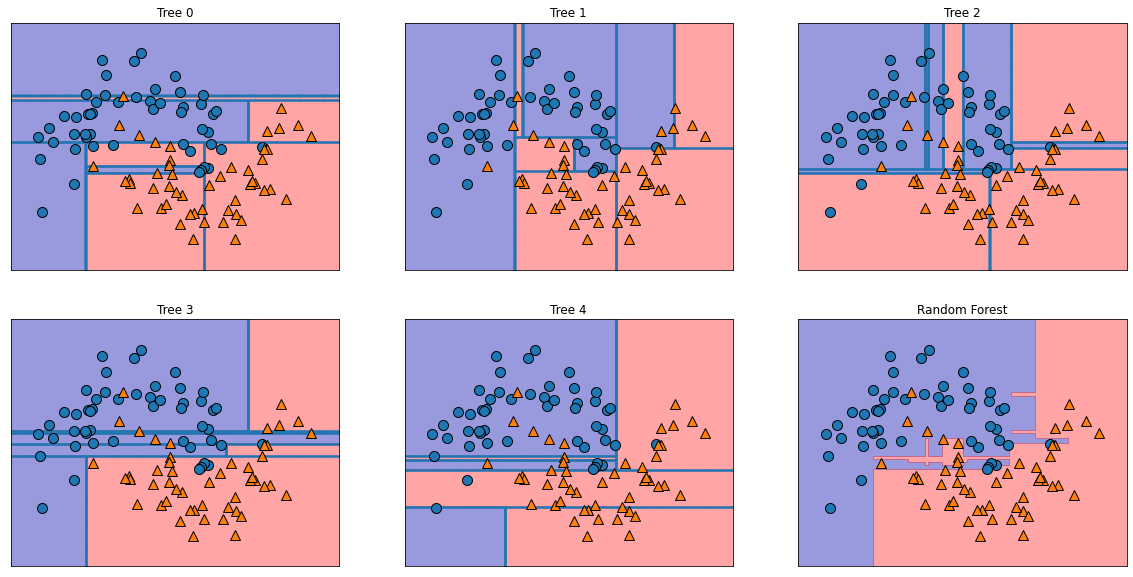

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
  ax.set_title(f"Tree {i}")
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(rf, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

print(f"훈련 세트 점수: {forest.score(X_train,  y_train): .2f}")
print(f"테스트 세트 점수: {forest.score(X_test,  y_test): .2f}")

훈련 세트 점수:  1.00
테스트 세트 점수:  0.97


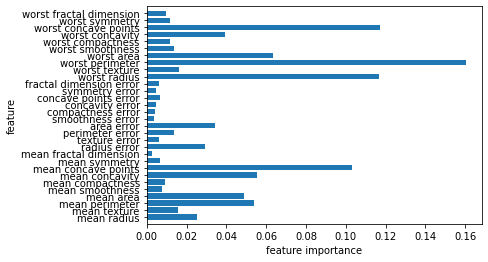

In [72]:
plot_feature_importances_cancer(forest)

# 그레디언트 부스팅

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=2022).fit(X_train, y_train)

print(f"훈련 세트 점수: {gbrt.score(X_train,  y_train): .3f}")
print(f"테스트 세트 점수: {gbrt.score(X_test,  y_test): .3f}")

훈련 세트 점수:  1.000
테스트 세트 점수:  0.958


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print(f"훈련 세트 점수: {gbrt.score(X_train,  y_train): .3f}")
print(f"테스트 세트 점수: {gbrt.score(X_test,  y_test): .3f}")

훈련 세트 점수:  0.991
테스트 세트 점수:  0.972


In [82]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print(f"훈련 세트 점수: {gbrt.score(X_train,  y_train): .3f}")
print(f"테스트 세트 점수: {gbrt.score(X_test,  y_test): .3f}")

훈련 세트 점수:  0.988
테스트 세트 점수:  0.965


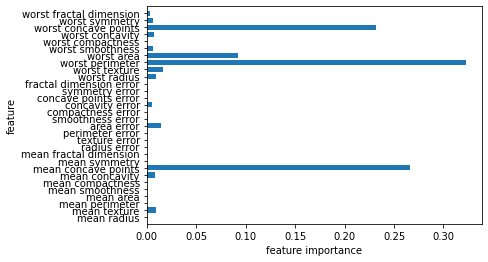

In [85]:
plot_feature_importances_cancer(gbrt)